In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# load data
mnist = input_data.read_data_sets("MNIST_data", one_hot=False)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
x = tf.placeholder(tf.float32, [None, 784])
keep_prob = tf.placeholder(tf.float32)
# add dropout noise (randomly set some values to zero) to make autoencoder more robust
x_noise = tf.nn.dropout(x, keep_prob)
# add gaussian noise
# x_noise = tf.add(x, tf.random_normal(tf.shape(x), mean=0.0, stddev=0.1))
lr = tf.Variable(1e-3, dtype=tf.float32)

# encoder
L1 = tf.layers.dense(x_noise, 256, tf.nn.tanh)
L2 = tf.layers.dense(L1, 128, tf.nn.tanh)
L3 = tf.layers.dense(L2, 64, tf.nn.tanh)
L4 = tf.layers.dense(L3, 3)

# decoder
L5 = tf.layers.dense(L4, 64, tf.nn.tanh)
L6 = tf.layers.dense(L5, 128, tf.nn.tanh)
L7 = tf.layers.dense(L6, 256, tf.nn.tanh)
prediction = tf.layers.dense(L7, 784, tf.nn.sigmoid)

loss = tf.losses.mean_squared_error(labels=x, predictions=prediction)
train_step = tf.train.AdamOptimizer(lr).minimize(loss)

In [4]:
# mini-batch gradient descent
batch_size = 256
n_batch = mnist.train.num_examples // batch_size

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(21):
    for batch in range(n_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, loss_ = sess.run([train_step, loss], feed_dict={x: batch_xs.astype(np.float32), keep_prob: 0.8})
    sess.run(tf.assign(lr, 0.001 * (0.95 ** epoch)))
    print("iter:", epoch, "loss: {:.4e} learning rate: {:.6f}".format(loss_, sess.run(lr)))

iter: 0 loss: 6.9338e-02 learning rate: 0.001000
iter: 1 loss: 6.1216e-02 learning rate: 0.000950
iter: 2 loss: 5.5367e-02 learning rate: 0.000903
iter: 3 loss: 4.8834e-02 learning rate: 0.000857
iter: 4 loss: 4.4501e-02 learning rate: 0.000815
iter: 5 loss: 4.1333e-02 learning rate: 0.000774
iter: 6 loss: 4.0623e-02 learning rate: 0.000735
iter: 7 loss: 3.9927e-02 learning rate: 0.000698
iter: 8 loss: 3.7410e-02 learning rate: 0.000663
iter: 9 loss: 3.6242e-02 learning rate: 0.000630
iter: 10 loss: 3.8966e-02 learning rate: 0.000599
iter: 11 loss: 3.6663e-02 learning rate: 0.000569
iter: 12 loss: 3.7928e-02 learning rate: 0.000540
iter: 13 loss: 3.5222e-02 learning rate: 0.000513
iter: 14 loss: 3.3669e-02 learning rate: 0.000488
iter: 15 loss: 3.6251e-02 learning rate: 0.000463
iter: 16 loss: 3.4651e-02 learning rate: 0.000440
iter: 17 loss: 3.4047e-02 learning rate: 0.000418
iter: 18 loss: 3.3102e-02 learning rate: 0.000397
iter: 19 loss: 3.4333e-02 learning rate: 0.000377
iter: 20 l

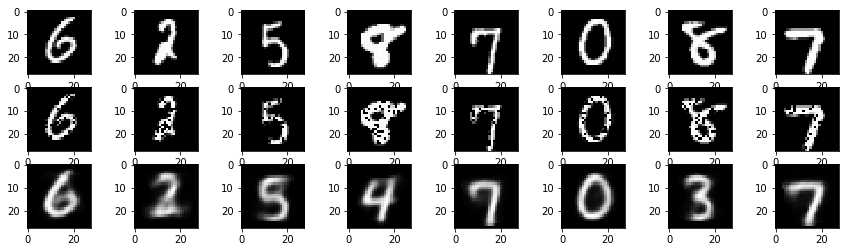

In [5]:
# visualize the origin digits and the results of autoencoder
fig, ax = plt.subplots(3, 8, figsize=(15, 4))
for i in range(8):
    sample = mnist.train.images[50 + i]
    ax[0, i].imshow(sample.reshape(28, 28))
    x_noise_, prediction_ = sess.run([x_noise, prediction], feed_dict={x: sample.reshape(1, 784), keep_prob: 0.8})
    ax[1, i].imshow(x_noise_.reshape(28, 28))
    ax[2, i].imshow(prediction_.reshape(28, 28))

In [6]:
# encode test data
test = sess.run(L4, feed_dict={x: mnist.test.images, keep_prob: 1.0})

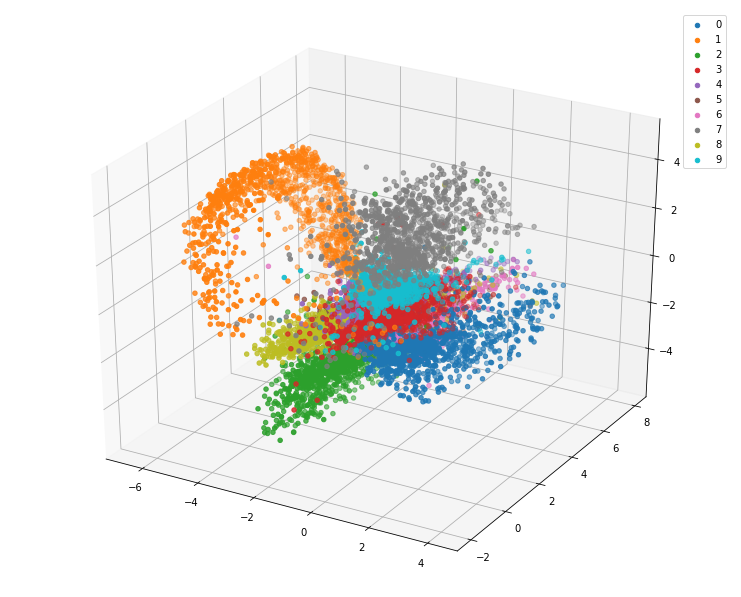

In [13]:
# visualize encoded test data
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
for i in range(10):
    mask = mnist.test.labels == i
    ax.scatter(test[mask][:, 0], test[mask][:, 1], test[mask][:, 2], label=i)
ax.legend()

In [8]:
sess.close()